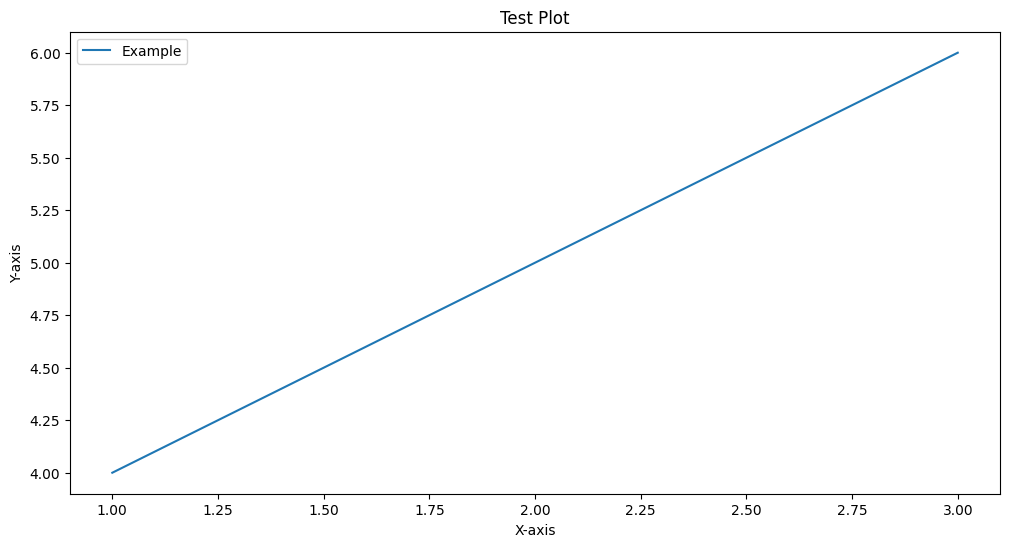

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot([1, 2, 3], [4, 5, 6], label='Example')
plt.title("Test Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


In [3]:
import yfinance as yf
import pandas as pd

# Define the tickers and time range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Download data and store in a dictionary
data = {}
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = df

# Display first few rows of TSLA data as an example
print("TSLA Data Preview:")
print(data['TSLA'].head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSLA Data Preview:
Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


In [4]:
# Let's examine TSLA's data for missing values
print("Missing values in TSLA data:")
print(data['TSLA'].isnull().sum())

# Optionally, fill missing values (example using forward-fill)
data['TSLA'] = data['TSLA'].fillna(method='ffill')

# Ensure the index is a datetime type (usually automatic)
data['TSLA'].index = pd.to_datetime(data['TSLA'].index)

# For all tickers, you might want to do similar cleaning
for ticker in tickers:
    data[ticker] = data[ticker].fillna(method='ffill')
    data[ticker].index = pd.to_datetime(data[ticker].index)


Missing values in TSLA data:
Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


<ipython-input-4-59c77e6060b9>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TSLA'] = data['TSLA'].fillna(method='ffill')
<ipython-input-4-59c77e6060b9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[ticker] = data[ticker].fillna(method='ffill')
<ipython-input-4-59c77e6060b9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[ticker] = data[ticker].fillna(method='ffill')
<ipython-input-4-59c77e6060b9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[ticker] = data[ticker].fillna(method='ffill')


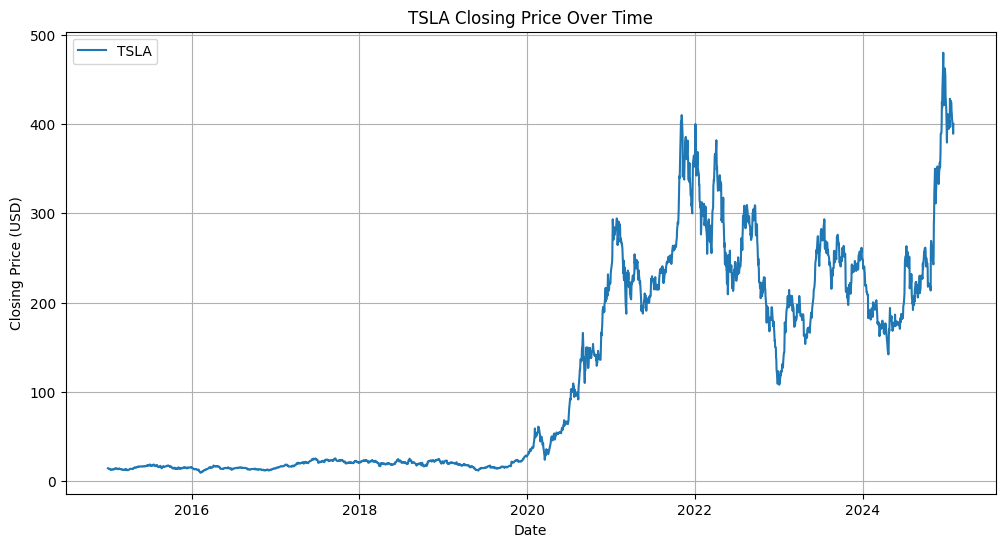

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['TSLA'].index, data['TSLA']['Close'], label='TSLA')
plt.title("TSLA Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


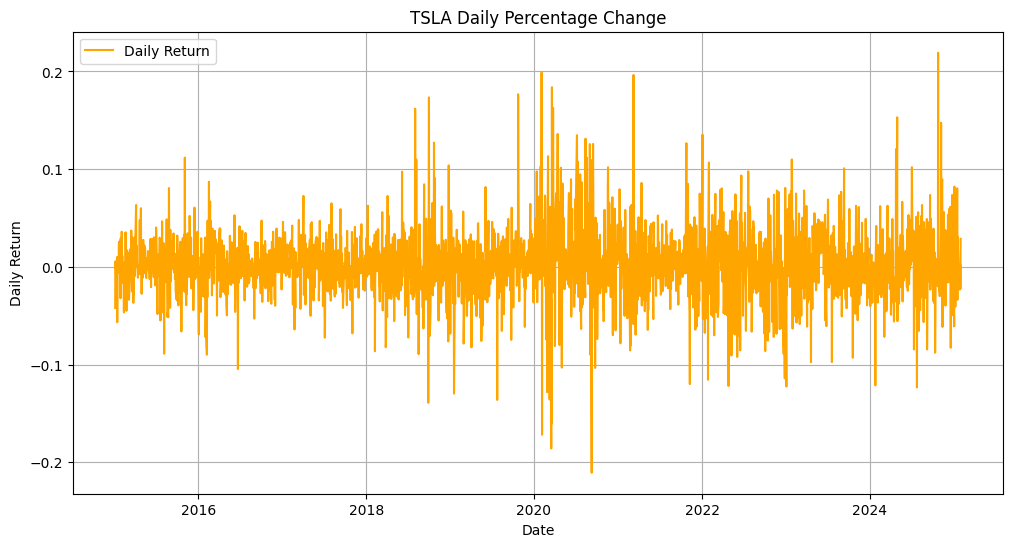

In [6]:
# Calculate daily returns for TSLA
data['TSLA']['Daily_Return'] = data['TSLA']['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(data['TSLA'].index, data['TSLA']['Daily_Return'], label='Daily Return', color='orange')
plt.title("TSLA Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()


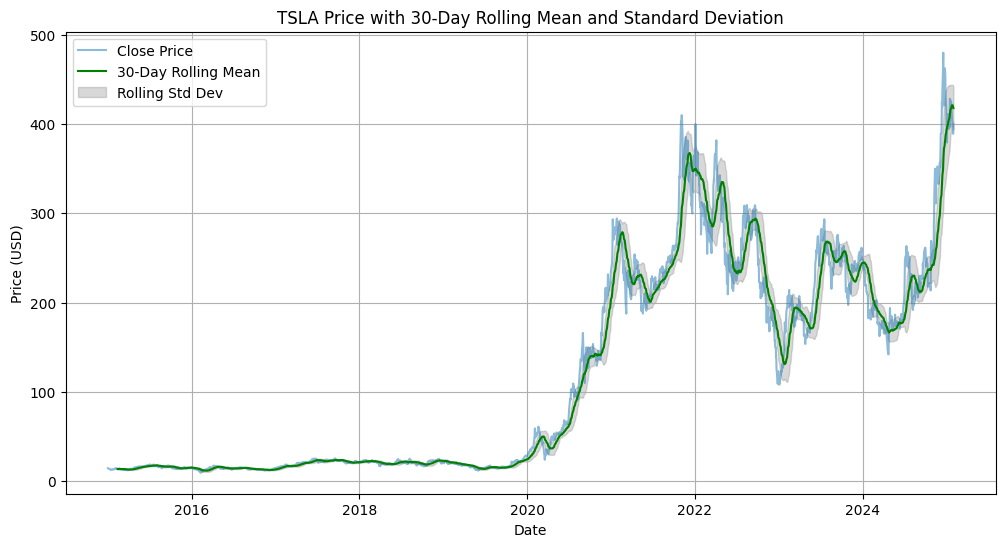

In [7]:
# Calculate 30-day rolling mean and standard deviation
data['TSLA']['Rolling_Mean'] = data['TSLA']['Close'].rolling(window=30).mean()
data['TSLA']['Rolling_Std'] = data['TSLA']['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['TSLA'].index, data['TSLA']['Close'], label='Close Price', alpha=0.5)
plt.plot(data['TSLA'].index, data['TSLA']['Rolling_Mean'], label='30-Day Rolling Mean', color='green')
plt.fill_between(data['TSLA'].index,
                 data['TSLA']['Rolling_Mean'] - data['TSLA']['Rolling_Std'],
                 data['TSLA']['Rolling_Mean'] + data['TSLA']['Rolling_Std'],
                 color='gray', alpha=0.3, label='Rolling Std Dev')
plt.title("TSLA Price with 30-Day Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


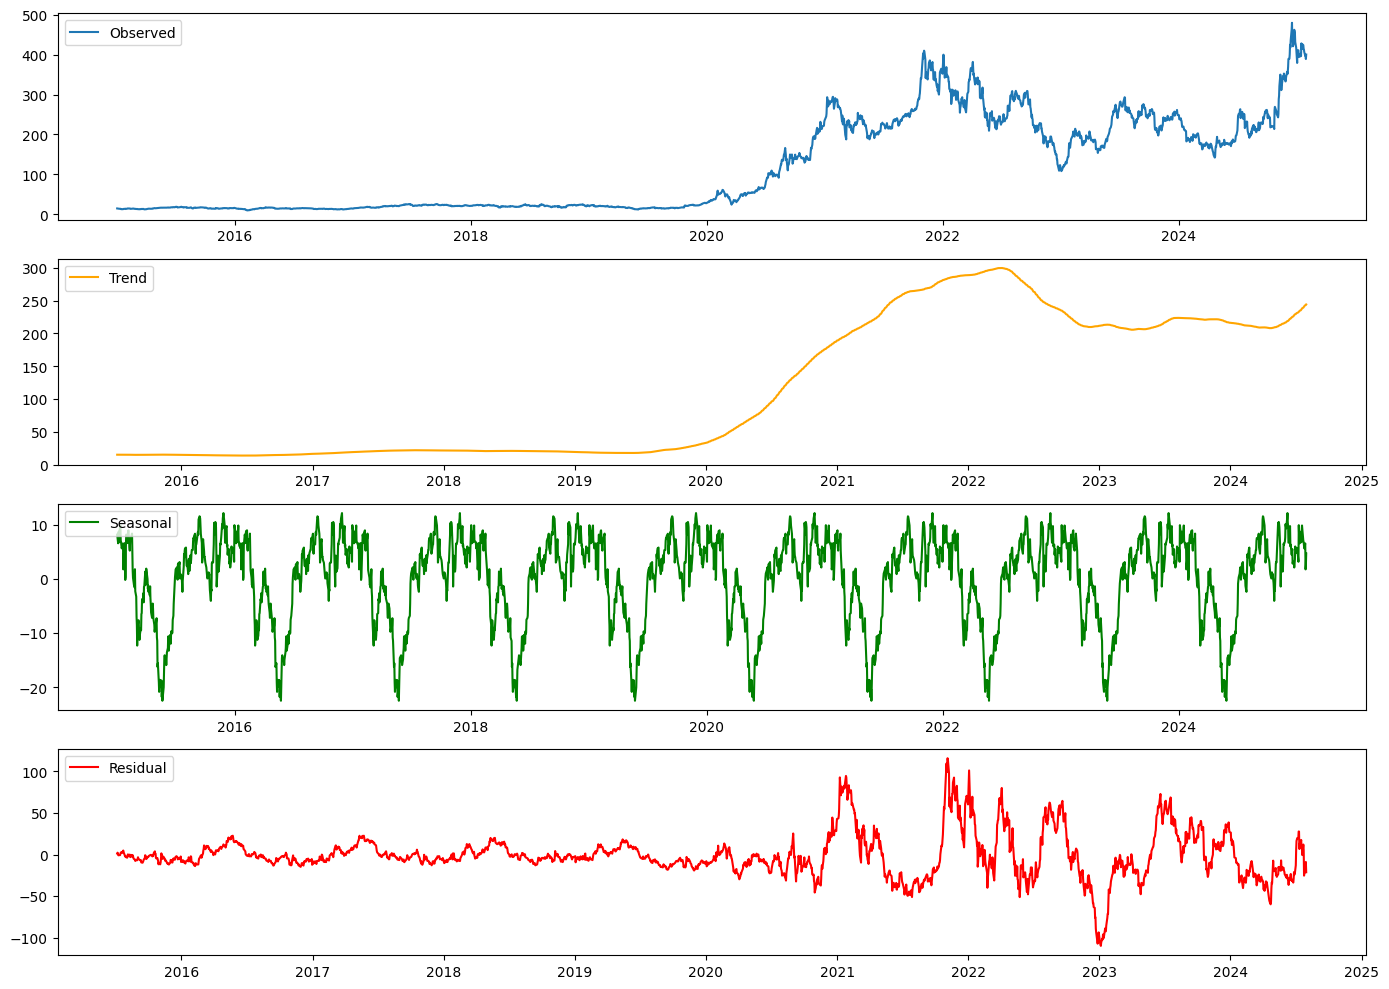

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose TSLA closing prices
decomposition = seasonal_decompose(data['TSLA']['Close'].dropna(), model='additive', period=252)  # using approx 252 trading days per year

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
